# Quick Data Exploration

## Import libraries

In [3]:
from pandas_profiling import ProfileReport
import pandas as pd
from scripts.helper import reduce_mem_usage
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option("display.max_columns", 120)

## Import cleaned datasets

In [4]:
dataset = pd.read_csv('data/cleaned_train_v2.csv')

/Users/sinalotfiomran/Fintechs_Capstone_Project/.venv/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [5]:
dataset_test = pd.read_csv('data/cleaned_test_v2.csv')

In [6]:
# Recude dataset size by changing the datatypes
dataset, NAlist = reduce_mem_usage(dataset)

Memory usage of properties dataframe is : 327.4687433242798  MB
******************************
Column:  Unnamed: 0
dtype before:  int64
dtype after:  uint32
******************************
******************************
Column:  date
dtype before:  int64
dtype after:  uint32
******************************
******************************
Column:  visitId
dtype before:  int64
dtype after:  uint32
******************************
******************************
Column:  visitNumber
dtype before:  int64
dtype after:  uint16
******************************
******************************
Column:  visitStartTime
dtype before:  int64
dtype after:  uint32
******************************
******************************
Column:  device.isMobile
dtype before:  int64
dtype after:  uint8
******************************
******************************
Column:  totals.bounces
dtype before:  float64
dtype after:  uint8
******************************
******************************
Column:  totals.hits
dtype befor

In [7]:
dataset_test, NAlist_test = reduce_mem_usage(dataset_test)

Memory usage of properties dataframe is : 76.98013019561768  MB
******************************
Column:  Unnamed: 0
dtype before:  int64
dtype after:  uint32
******************************
******************************
Column:  date
dtype before:  int64
dtype after:  uint32
******************************
******************************
Column:  visitId
dtype before:  int64
dtype after:  uint32
******************************
******************************
Column:  visitNumber
dtype before:  int64
dtype after:  uint16
******************************
******************************
Column:  visitStartTime
dtype before:  int64
dtype after:  uint32
******************************
******************************
Column:  device.isMobile
dtype before:  int64
dtype after:  uint8
******************************
******************************
Column:  totals.bounces
dtype before:  float64
dtype after:  uint8
******************************
******************************
Column:  totals.hits
dtype befor

In [8]:
print("Number of common visitors in train and test set : ",len(set(dataset.fullVisitorId.unique()).intersection(set(dataset_test.fullVisitorId.unique())) ))

Number of common visitors in train and test set :  2545


In [9]:
dataset_test.shape

(401589, 26)

## Generate Profile Report

In [10]:
profile = ProfileReport(dataset, title="FinTechs Report", explorative=True)

In [11]:
profile

Render HTML: 100%|██████████| 1/1 [00:05<00:00,  5.43s/it]


## Distribution of Channelgrouping of all sessions

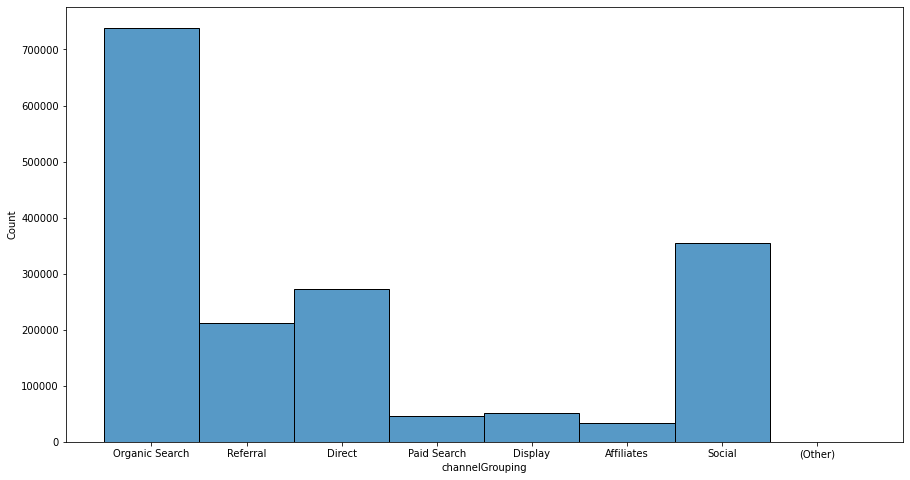

In [12]:
fig, ax = plt.subplots(figsize=(15,8))
ax = sns.histplot(data=dataset, x="channelGrouping")

## Distribution of Channelgrouping of the sessions with non-zero Revenue

In [13]:
df_nonz = dataset[dataset['totals.transactionRevenue']>0]

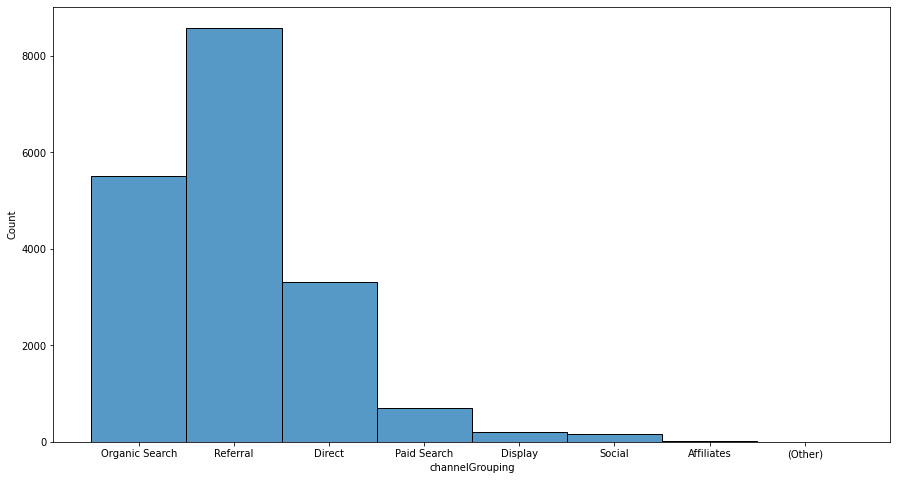

In [14]:
fig, ax = plt.subplots(figsize=(15,8))
ax = sns.histplot(data=df_nonz, x="channelGrouping")

## Converting Timestamps to extra Day, Month, Year Columns

In [15]:
# Converting POSIX data from visiStartTime column and replace it in date column
dataset['date'] = pd.to_datetime(dataset['visitStartTime'], unit='s').dt.strftime('%Y-%m-%d')
dataset = dataset.drop('visitStartTime', axis=1)

In [16]:
dataset = dataset.assign(
    Date = lambda x: pd.to_datetime(x['date']).dt.date,
    Year = lambda x: pd.to_datetime(x['date']).dt.year,
    Month = lambda x: pd.to_datetime(x['date']).dt.month,
    Day = lambda x: pd.to_datetime(x['date']).dt.day
)
print(f'Start of year: {dataset.Year.min()}')
print(f'Start of year: {dataset.Year.max()}')

Start of year: 2016
Start of year: 2018


## Plotting Total Transactions Revenue vs Country

In [19]:
# Grouping Dataset by Country and sort values
obj = dataset.groupby('geoNetwork.country')["totals.transactionRevenue"].sum().sort_values(ascending =False).reset_index()

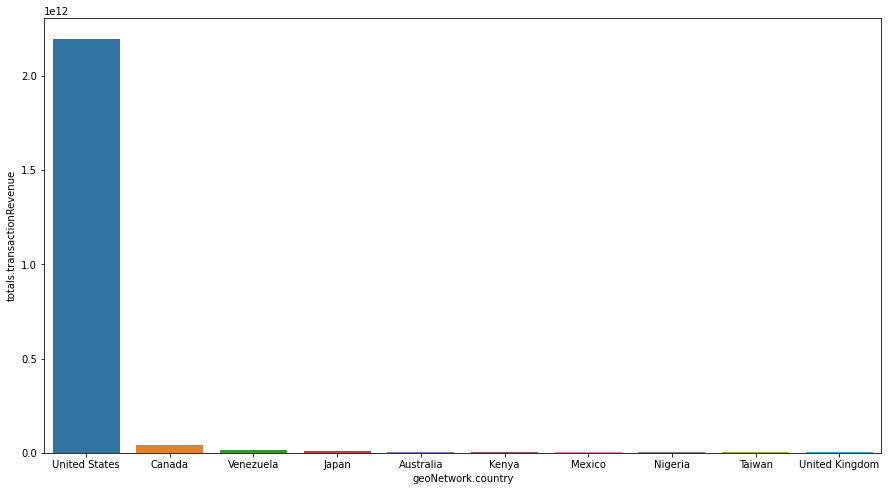

In [20]:
# Plotting Country vs Transaction Revenue
fig, ax = plt.subplots(figsize=(15,8))
ax = sns.barplot(data=obj, x=obj['geoNetwork.country'].head(10), y=obj['totals.transactionRevenue'].head(10))

In [21]:
# Calculating the percentage of Non Transactions Revenue Sessions in Canada
canada_total = dataset[dataset['geoNetwork.country']== 'Canada']

In [22]:
ntr_canada = dataset[(dataset['geoNetwork.country'] == 'Canada') & (dataset['totals.transactionRevenue']!= 0)]

In [40]:
print('Percentage of Non-Zero Revenue Sessions in Canada: %.2f%%' % ((len(ntr_canada) / len(canada_total)) *100))

Percentage of Non-Zero Revenue Sessions in Canada: 0.62%


## Plotting Total Transactions Revenue vs Browsers

In [24]:
# Grouping Dataset by Device Browsers and sort values
obj = dataset.groupby('device.browser')["totals.transactionRevenue"].sum().sort_values(ascending =False).reset_index()

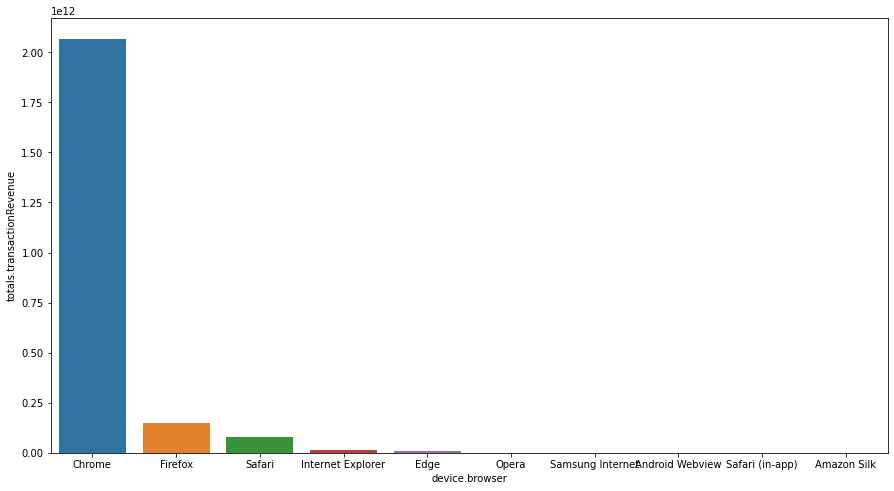

In [25]:
# Plotting Device Browsers vs Transaction Revenue
fig, ax = plt.subplots(figsize=(15,8))
ax = sns.barplot(data=obj, x=obj['device.browser'].head(10), y=obj['totals.transactionRevenue'].head(10))

## Plotting Total Transactions Revenue vs Visit Numbers

In [26]:
# Grouping Dataset by Number of Visits and sort values
obj = dataset.groupby('visitNumber')["totals.transactionRevenue"].mean().sort_values(ascending =False).reset_index()

visitNumber  totals.transactionRevenue
0           365               1.322940e+10
1           353               6.146500e+09
2           327               4.962555e+09
3           243               3.854917e+09
4           378               2.695220e+09
5           237               1.735566e+09
6           181               1.373500e+09
7           305               1.166280e+09
8           245               9.752800e+08
9           258               9.357400e+08
10          312               8.316667e+08
11          259               6.118200e+08
12          246               5.037000e+08
13          396               3.990750e+08
14          315               3.989133e+08
15          296               3.560625e+08
16          430               3.306900e+08
17          334               3.020350e+08
18          293               1.024900e+08
19          359               8.363500e+07

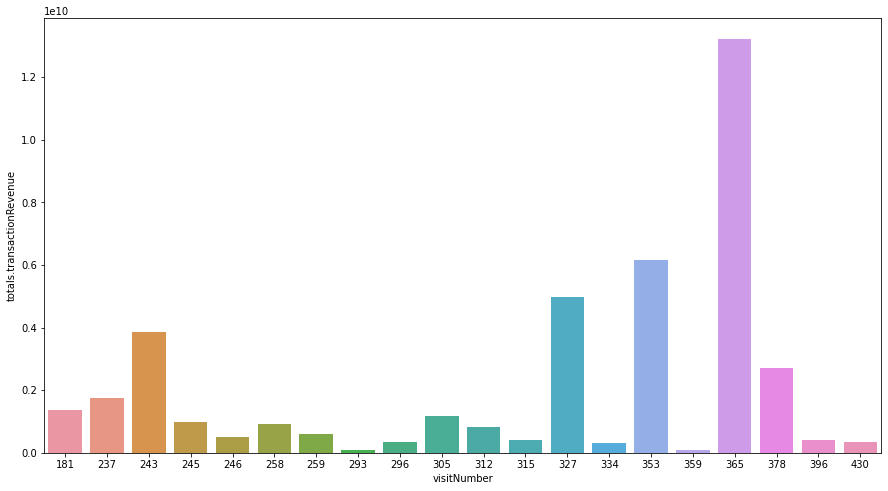

In [27]:
# Plotting Number of Visits vs Transaction Revenue
fig, ax = plt.subplots(figsize=(15,8))
ax = sns.barplot(data=obj, x=obj['visitNumber'].head(20), y=obj['totals.transactionRevenue'].head(20))

## Plotting Total Transactions Revenue vs Page Views

In [28]:
# Grouping Dataset by Total number of Page Views and sort values
obj = dataset.groupby('totals.pageviews')["totals.transactionRevenue"].mean().sort_values(ascending =False).reset_index()
obj.head(20)

totals.pageviews  totals.transactionRevenue
0                151               6.826960e+09
1                431               1.720930e+09
2                323               1.520530e+09
3                193               7.351800e+08
4                196               6.511000e+08
5                 89               5.533890e+08
6                202               4.985000e+08
7                343               4.719200e+08
8                114               4.283675e+08
9                 81               3.864664e+08
10               109               3.713214e+08
11               120               3.667350e+08
12               116               3.528086e+08
13               112               3.329409e+08
14               224               2.816467e+08
15                64               2.773396e+08
16               115               2.734060e+08
17               215               2.524600e+08
18                87               2.482505e+08
19               161               2.464367e+08

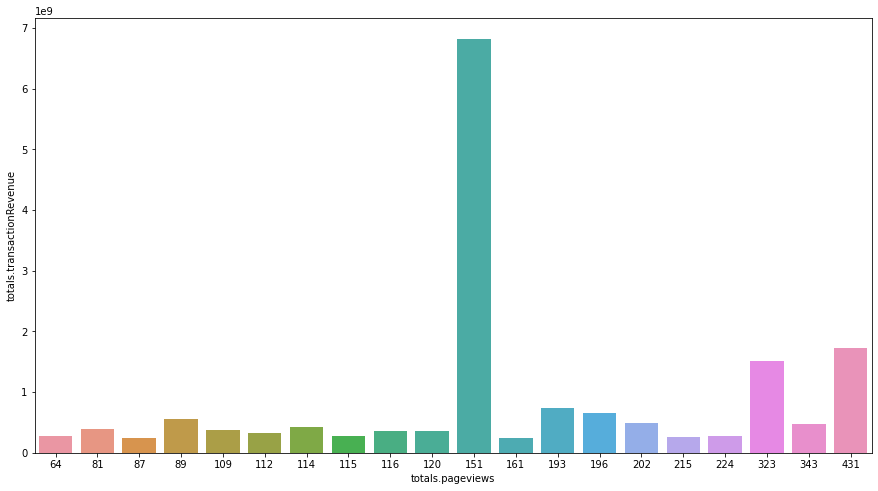

In [29]:
# Plotting Number of Total number of Page Views vs Transaction Revenue
fig, ax = plt.subplots(figsize=(15,8))
ax = sns.barplot(data=obj, x=obj['totals.pageviews'].head(20), y=obj['totals.transactionRevenue'].head(20))

## Plotting Total Transactions Revenue vs Total Hits

In [31]:
# Grouping Dataset by Total Hits and sort values
obj = dataset.groupby('totals.hits')["totals.transactionRevenue"].mean().sort_values(ascending =False).reset_index()
obj.head(20)

totals.hits  totals.transactionRevenue
0           292               1.890180e+09
1           227               1.879125e+09
2           136               1.678499e+09
3           328               8.449400e+08
4           378               7.602650e+08
5           286               7.351800e+08
6           171               6.684533e+08
7           221               6.276000e+08
8           111               4.696838e+08
9           139               3.907280e+08
10          161               3.590000e+08
11           91               3.497635e+08
12          125               3.472432e+08
13          170               3.457767e+08
14          331               3.299100e+08
15          169               3.271000e+08
16          268               3.255500e+08
17          210               2.878400e+08
18          246               2.823700e+08
19          156               2.796218e+08

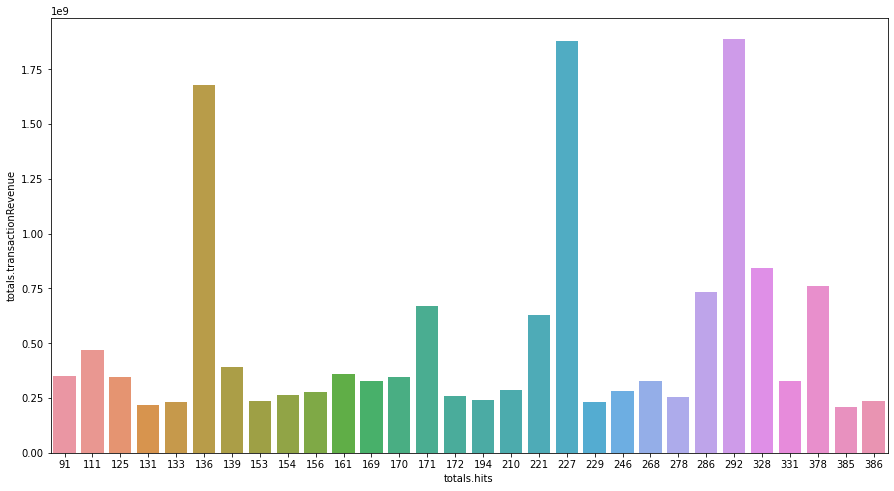

In [32]:
# Plotting Number of Total Hits vs Transaction Revenue
fig, ax = plt.subplots(figsize=(15,8))
ax = sns.barplot(data=obj, x=obj['totals.hits'].head(30), y=obj['totals.transactionRevenue'].head(30))

## Plotting Total Transactions Revenue vs Months in 2017 and 2018

In [33]:
# Grouping Dataset by Months of 2017 and sort values
obj = dataset[dataset['Year']==2017].groupby('Month')["totals.transactionRevenue"].sum().sort_values(ascending =False).reset_index()
obj

Month  totals.transactionRevenue
0       4               158243320000
1       8               157296010000
2       3               131620960000
3       7               123368930000
4       6               122303700000
5       5               121299990000
6       2               108481800000
7       9               102544790000
8       1                97173750000
9      10                79071120000
10     12                76338670000
11     11                65224200000

/Users/sinalotfiomran/Fintechs_Capstone_Project/.venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
No handles with labels found to put in legend.


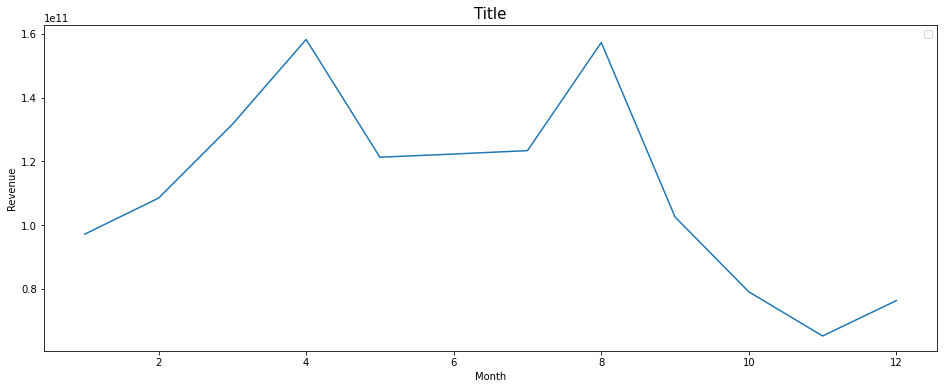

(<matplotlib.legend.Legend at 0x1715d9040>, None)

In [34]:
# Plotting Months of 2017 vs Transaction Revenue
plt.figure(figsize=(16,6))
plt.title('Title', fontdict={'fontsize': 15}), plt.xlabel('Month'), plt.ylabel('Revenue')
sns.lineplot(obj['Month'], obj['totals.transactionRevenue'], label='')
plt.legend(), plt.show()

In [35]:
# Grouping Dataset by Months of 2018 and sort values
obj = dataset[dataset['Year']==2018].groupby('Month')["totals.transactionRevenue"].sum().sort_values(ascending =False).reset_index()
obj

Month  totals.transactionRevenue
0      3                91449890000
1      4                77997050000
2      1                72024500000
3      2                63229850000
4      5                 1453230000

/Users/sinalotfiomran/Fintechs_Capstone_Project/.venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
No handles with labels found to put in legend.


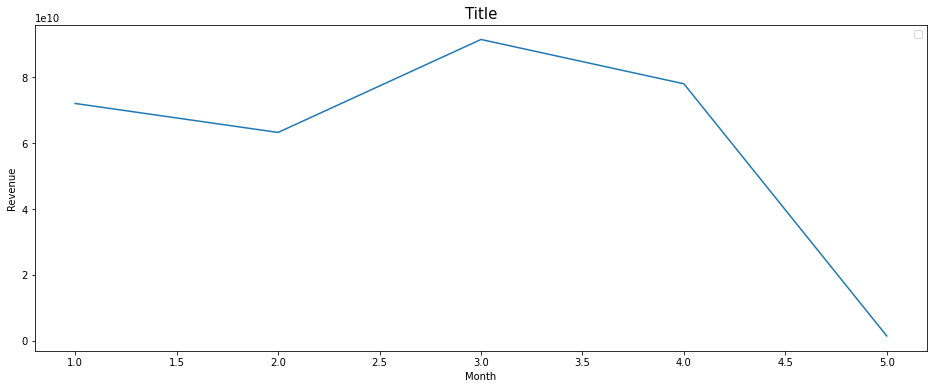

(<matplotlib.legend.Legend at 0x1626d44f0>, None)

In [36]:
# Plotting Months of 2018 vs Transaction Revenue
plt.figure(figsize=(16,6))
plt.title('Title', fontdict={'fontsize': 15}), plt.xlabel('Month'), plt.ylabel('Revenue')
sns.lineplot(obj['Month'], obj['totals.transactionRevenue'], label='')
plt.legend(), plt.show()